In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
sns.set(rc={'figure.figsize':(20,10)})

## Visualizacion

In [16]:
columns = ["Country Name", "1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019"]
full_df = pd.read_csv('./API_SP.DYN.TFRT.IN_DS2_en_csv_v2_3471714.csv', usecols=columns)
full_df.head()

means_columns = ["1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019"]
mean_dict = {}
for column in means_columns:
    mean_dict[column] = full_df[column].mean()
mean_dict['Country Name'] = 'Promedio'
mean_df = pd.DataFrame([mean_dict])
full_df = pd.concat([full_df, mean_df])



In [17]:
def get_countries_df(countries):
    birth_columns = ["1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019"]
    dictionary_list = []
    for country in countries:
        country_df = full_df[full_df['Country Name'] == country]
        values = country_df.values[0]
        for i, col in enumerate(birth_columns):
            dictionary = {}
            dictionary['country'] = values[0]
            dictionary['year'] = col
            dictionary['birthrate'] = values[i + 1]
            dictionary['style'] = 0
            
            if (country == 'Promedio'):
                dictionary['style'] = 1
    
            if (country == 'Prediccion'):
                dictionary['style'] = 2
    
            dictionary_list.append(dictionary)
            
    return pd.DataFrame(dictionary_list)

In [18]:
full_df.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,4.820000,4.655000,4.471000,4.271000,4.059000,3.842000,3.625000,3.417000,3.226000,...,1.768000,1.779000,1.795000,1.813000,1.834000,1.854000,1.872000,1.886000,1.896000,1.901000
1,Africa Eastern and Southern,6.723308,6.738651,6.752818,6.765400,6.775406,6.783357,6.789885,6.796040,6.801478,...,5.027698,4.956842,4.882058,4.804516,4.726220,4.647637,4.569675,4.493744,4.420264,4.349433
2,Afghanistan,7.450000,7.450000,7.450000,7.450000,7.450000,7.450000,7.450000,7.450000,7.450000,...,5.977000,5.770000,5.562000,5.359000,5.163000,4.976000,4.800000,4.633000,4.473000,4.321000
3,Africa Western and Central,6.439002,6.455523,6.471399,6.487246,6.502619,6.519050,6.537615,6.560078,6.586665,...,5.607672,5.557872,5.503781,5.446144,5.384336,5.319473,5.251674,5.182391,5.113003,5.044144
4,Angola,6.708000,6.790000,6.872000,6.954000,7.036000,7.116000,7.194000,7.267000,7.332000,...,6.194000,6.120000,6.039000,5.953000,5.864000,5.774000,5.686000,5.600000,5.519000,5.442000


<AxesSubplot:xlabel='year', ylabel='birthrate'>

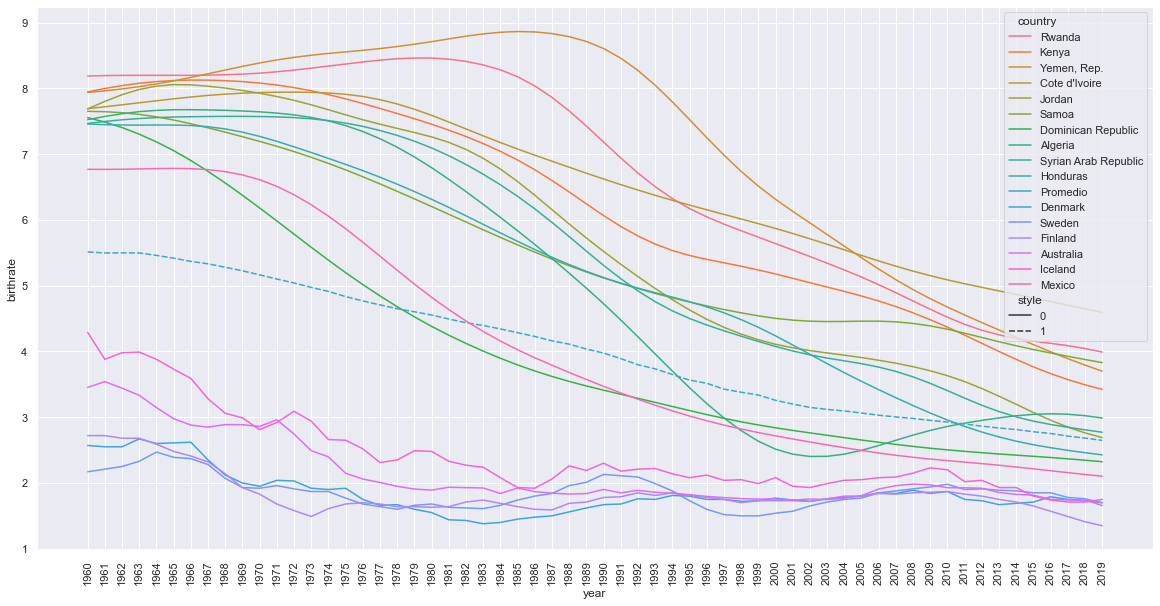

In [19]:
top_birthrate_df = full_df.sort_values(by=['1960'], ascending=False).head(10)
countries = top_birthrate_df['Country Name'].unique().tolist()
countries.append('Promedio')
countries.append('Denmark')
countries.append('Sweden')
countries.append('Finland')
countries.append('Australia')
countries.append('Iceland')
countries.append('Mexico')

test = get_countries_df(countries)

plt.xticks(rotation=90)
sns.lineplot(x="year", y="birthrate",
             hue="country",
             style="style",
             data=test)

## Entrenar Red Neuronal

In [20]:
def decompose_series(series, length):
    x, y = list(), list()
    for i in range(len(series)):
        final = i + length
        if final > len(series) - 1:
            break
        x_history, target_y = series[i:final], series[final]
        x.append(x_history)
        y.append(target_y)
    return np.array(x), np.array(y)

In [21]:
del mean_dict['Country Name']
training_data_df = pd.DataFrame(list(mean_dict.items()), columns=['year', 'birthrate'])

birthrate_sequence = list(training_data_df['birthrate'])
x, y = decompose_series(birthrate_sequence, 3)

In [22]:
model = Sequential()
model.add(Dense(2, activation='sigmoid', input_dim=3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='SGD', metrics=['accuracy'])
model.fit(x, y, epochs=350, batch_size = 3)

Epoch 1/350
19/19 [==============================] - 0s 5ms/step - loss: 6.8859 - accuracy: 0.0000e+00
Epoch 2/350
19/19 [==============================] - 0s 8ms/step - loss: 1.6894 - accuracy: 0.0000e+00
Epoch 3/350
19/19 [==============================] - 0s 2ms/step - loss: 0.9916 - accuracy: 0.0000e+00
Epoch 4/350
19/19 [==============================] - 0s 2ms/step - loss: 0.8325 - accuracy: 0.0000e+00
Epoch 5/350
19/19 [==============================] - 0s 2ms/step - loss: 0.7779 - accuracy: 0.0000e+00
Epoch 6/350
19/19 [==============================] - 0s 2ms/step - loss: 0.7420 - accuracy: 0.0000e+00
Epoch 7/350
19/19 [==============================] - 0s 2ms/step - loss: 0.7035 - accuracy: 0.0000e+00
Epoch 8/350
19/19 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.0000e+00
Epoch 9/350
19/19 [==============================] - 0s 2ms/step - loss: 0.6624 - accuracy: 0.0000e+00
Epoch 10/350
19/19 [==============================] - 0s 2ms/step - loss:

In [23]:
predictions = model.predict(x)
dictionary = {}

for i, data in enumerate(predictions):
    dictionary[means_columns[i + 3]] = data[0]
dictionary['Country Name'] = 'Prediccion'
dictionary['1960'] = x[0][0]
dictionary['1961'] = x[0][1]
dictionary['1962'] = x[0][2]

pred_df = pd.DataFrame([dictionary])

full_df = pd.concat([full_df, mean_df, pred_df])

<AxesSubplot:xlabel='year', ylabel='birthrate'>

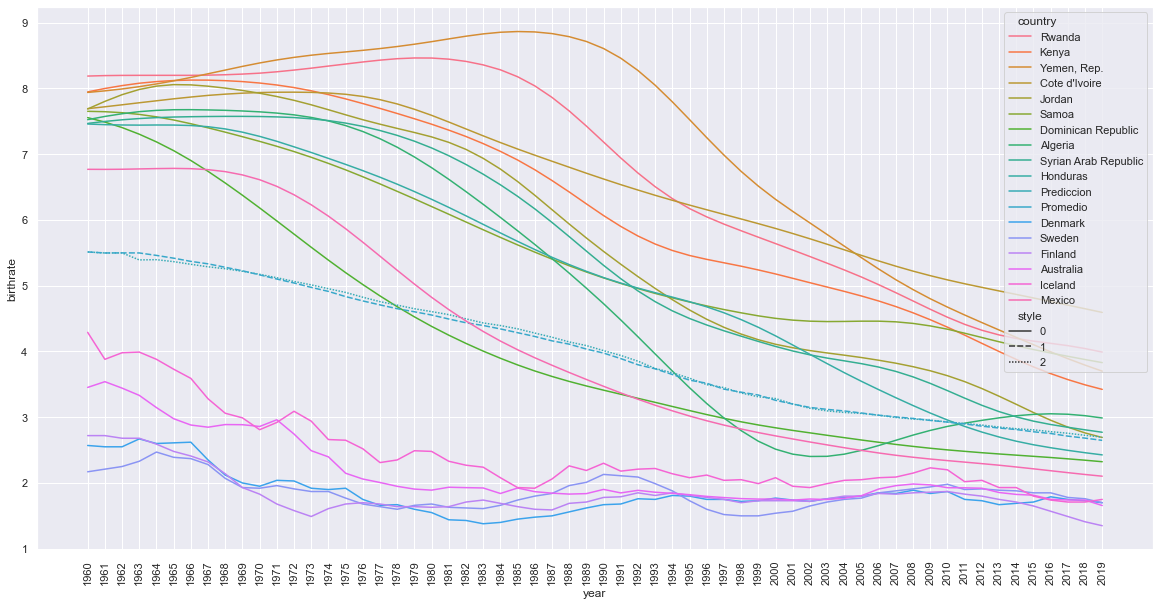

In [24]:
top_birthrate_df = full_df.sort_values(by=['1960'], ascending=False).head(10)
countries = top_birthrate_df['Country Name'].unique().tolist()
countries.append('Prediccion')
countries.append('Promedio')
countries.append('Denmark')
countries.append('Sweden')
countries.append('Finland')
countries.append('Australia')
countries.append('Iceland')
countries.append('Mexico')

test = get_countries_df(countries)

plt.xticks(rotation=90)
sns.lineplot(x="year", y="birthrate",
             hue="country",
             style='style',
             data=test)

## Desempeño del Modelo

In [25]:
mean_diff_arr = (pred_df[means_columns] - mean_df[means_columns]).values[0]
n = len(mean_diff_arr)

mae = sum(abs(mean_diff_arr))/n
rmse = (sum(mean_diff_arr ** 2)/n) ** (1/2)

In [26]:
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 0.03178656105641802
Root Mean Squared Error: 0.03876721142703545
